In [1]:
from google.colab import files 
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [2]:
import pandas as pd 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from keras.models import Sequential 
from keras.layers import Dense 

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# column 'id' only just identifier, don't have any correlation 
#  ---> to the analysis 

df = df.drop(columns = 'Id') 


In [6]:
# we need to one hot encoding the label because it is categorical 
category = pd.get_dummies(df.Species) 
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [8]:
new_df = pd.concat([df, category], axis = 1)
new_df = new_df.drop(columns='Species') 
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [9]:
dataset = new_df.values  
dataset 

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [10]:
# choose 4 first column as an attribute 
x = dataset[:,0:4]
# choose 3 last column as label 
y = dataset[:,4:7]


In [11]:
#normalize 
min_max_scaler = preprocessing.MinMaxScaler()
x_scale        = min_max_scaler.fit_transform(x)
x_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:

#split model into train test 
x_train , x_test , y_train , y_test = train_test_split(x_scale, y , test_size = 0.3 ) 


In [17]:
# using 3 layer . Softmax is used as an activation function 
# because it is commonly as a multi class classification
model = Sequential([
                    Dense(64, activation = 'relu', input_shape=(4,)),
                    Dense(64, activation ='relu'),
                    Dense(3, activation='softmax'),
])

In [19]:
# multi category classification use categorical crossentropy 
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(x_train , y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0887 - accuracy: 0.2857
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0542 - accuracy: 0.3619
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0239 - accuracy: 0.3238
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9956 - accuracy: 0.4762
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9670 - accuracy: 0.6571
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9387 - accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9100 - accuracy: 0.6667
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8805 - accuracy: 0.6667
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.6667
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.6667
Epoch 11/100
4/4 [===========

In [21]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 1.0000


[0.07597843557596207, 1.0]

In [23]:
import matplotlib.pyplot as plt

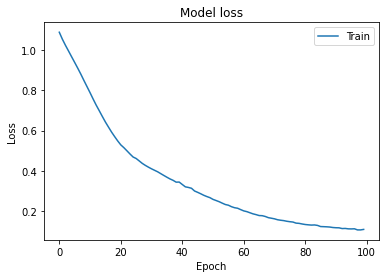

In [24]:
# generate plot loss every epoch iteration
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
# plot the accuracy for every epoch iteration
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()